# Take in the dataset

In [1]:
# Take in the dataset
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer



dataset = pd.read_csv('mxmh_survey_results.csv')
dataset

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


## Remove null values

In [2]:
# Remove null values
dataset = dataset.dropna()
dataset

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


## Remove useless columns

In [3]:
# Remove useless columns
dataset = dataset.drop('Permissions', axis=1)
dataset = dataset.drop('While working', axis=1)
dataset = dataset.drop('Timestamp', axis=1)
dataset = dataset.drop('Instrumentalist', axis=1)
dataset = dataset.drop('Composer', axis=1)
dataset = dataset.drop('Exploratory', axis=1)
dataset

,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,Video game music,Yes,132.0,Never,Never,Very frequently,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Jazz,Yes,84.0,Sometimes,Never,Never,Rarely,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,R&B,No,107.0,Never,Never,Rarely,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Jazz,Yes,86.0,Rarely,Sometimes,Never,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Video game music,Yes,66.0,Sometimes,Never,Rarely,Sometimes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Rock,Yes,120.0,Very frequently,Rarely,Never,Sometimes,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Pop,Yes,160.0,Rarely,Rarely,Never,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Rap,No,120.0,Rarely,Sometimes,Sometimes,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Classical,No,170.0,Very frequently,Never,Never,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


## Get dataset info

In [4]:
# Get dataset info
dataset.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,616.000000,616.000000,6.160000e+02,616.000000,616.000000,616.000000,616.000000
mean,24.792208,3.702435,1.623500e+06,5.883929,4.894481,3.801136,2.659091
std,11.658515,3.071961,4.029114e+07,2.758269,2.998005,3.111972,2.857285
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


## Visualise the dataset

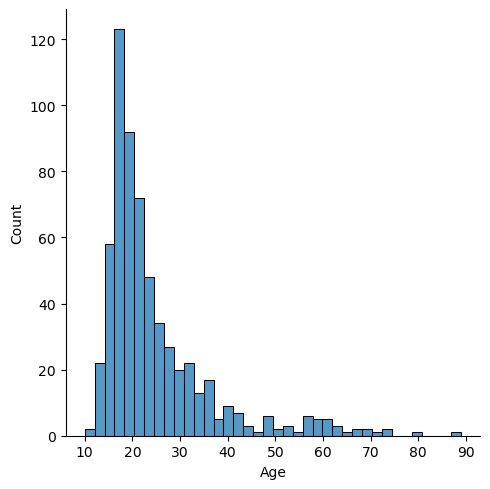

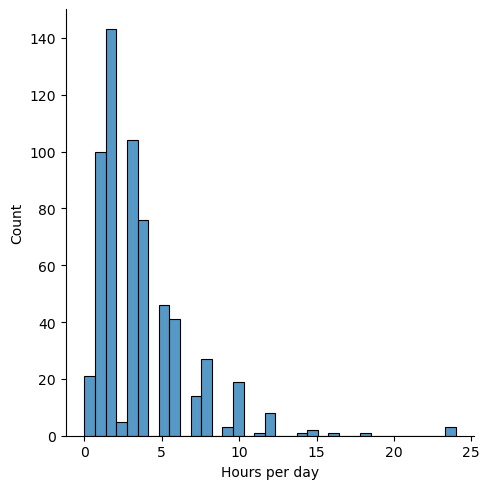

In [5]:
# Visualise the dataset
sns.displot(dataset['Age'])
sns.displot(dataset['Hours per day'])

#right skewed so there is outliers in our dataset for age and hours per day

## Find outliers

In [6]:
# Find outliers
z_scores = zscore(dataset['BPM'])
threshold = 3
outlier_indices = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = dataset['BPM'][outlier_indices]
print(outlier_values)
# using 3 because 99.7% of the data falls within 3 standard deviations of the mean


568    999999999.0
Name: BPM, dtype: float64


## Set limits to z-score for anxiety

In [7]:
#set limits to z-score for anxiety to search for outliers
upper_limit = dataset['Anxiety'].mean() + 3*dataset['Anxiety'].std()
lower_limit = dataset['Anxiety'].mean() - 3*dataset['Anxiety'].std()
print('upper limit:', upper_limit)
print('lower limit', lower_limit)


upper limit: 14.158736852627136
lower limit -2.390879709769994


## Checks their are no outliers

In [8]:
dataset.loc[(dataset['Anxiety'] > upper_limit) | (dataset['Anxiety'] < lower_limit)]
#no outliers


,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects


## Check visually for 'Hours per day' outliers

In [9]:
#  sns.boxplot(dataset['Hours per day'])

#each dot is an outlier,  8 outliers in this feature

## Removing the age outliers

In [10]:
# Removing the age outliers
dataset = dataset.drop(dataset[dataset['Age'] > 74].index)
dataset.loc[(dataset['Age'] > 74)]

,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects


## Removing the Hours per day outliers

In [11]:
# Removing the Hours per day outliers
dataset = dataset.drop(dataset[dataset['Hours per day'] > 15].index)
dataset.loc[(dataset['Hours per day'] > 15)]

,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects


## Check for BPM outliers

In [12]:
# Check for BPM outliers
max_limit = dataset['BPM'].mean() + 3*dataset['BPM'].std()
min_limit = dataset['BPM'].mean() - 3*dataset['BPM'].std()
dataset.loc[(dataset['BPM'] > max_limit) | (dataset['BPM'] < min_limit)]
outliers = dataset.loc[(dataset['BPM'] > max_limit) | (dataset['BPM'] < min_limit)]
print("Number of outliers:", len(outliers))
print('outliers', outliers)

Number of outliers: 1
outliers       Age Primary streaming service  Hours per day         Fav genre  \
568  16.0                   Spotify            7.0  Video game music   

    Foreign languages          BPM Frequency [Classical] Frequency [Country]  \
568                No  999999999.0                 Never              Rarely   

    Frequency [EDM] Frequency [Folk]  ... Frequency [Pop] Frequency [R&B]  \
568       Sometimes           Rarely  ...       Sometimes           Never   

     Frequency [Rap] Frequency [Rock] Frequency [Video game music] Anxiety  \
568  Very frequently           Rarely                    Sometimes     4.0   

    Depression Insomnia  OCD Music effects  
568        8.0      8.0  4.0     No effect  

[1 rows x 27 columns]


## Checks BPM outliers have been removed

In [13]:
dataset = dataset.drop(dataset[(dataset['BPM'] > 200 )| (dataset['BPM'] < 50)].index)
dataset.loc[(dataset['BPM']> 200 )| (dataset['BPM'] < 50)]

,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects


## View cleaned dataset

In [14]:
dataset

,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,Video game music,Yes,132.0,Never,Never,Very frequently,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Jazz,Yes,84.0,Sometimes,Never,Never,Rarely,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,R&B,No,107.0,Never,Never,Rarely,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Jazz,Yes,86.0,Rarely,Sometimes,Never,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Video game music,Yes,66.0,Sometimes,Never,Rarely,Sometimes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Rock,Yes,120.0,Very frequently,Rarely,Never,Sometimes,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Pop,Yes,160.0,Rarely,Rarely,Never,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Rap,No,120.0,Rarely,Sometimes,Sometimes,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Classical,No,170.0,Very frequently,Never,Never,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


## Adding a mental health score column

In [15]:
 dataset["Mental health score"] = (dataset['Anxiety'] + dataset['Depression'] + dataset['OCD'] + dataset['Insomnia']) 
dataset

,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Mental health score
2,18.0,Spotify,4.0,Video game music,Yes,132.0,Never,Never,Very frequently,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,26.0
3,61.0,YouTube Music,2.5,Jazz,Yes,84.0,Sometimes,Never,Never,Rarely,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,22.0
4,18.0,Spotify,4.0,R&B,No,107.0,Never,Never,Rarely,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,23.0
5,18.0,Spotify,5.0,Jazz,Yes,86.0,Rarely,Sometimes,Never,Never,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,30.0
6,18.0,YouTube Music,3.0,Video game music,Yes,66.0,Sometimes,Never,Rarely,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Rock,Yes,120.0,Very frequently,Rarely,Never,Sometimes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,22.0
732,18.0,Spotify,1.0,Pop,Yes,160.0,Rarely,Rarely,Never,Never,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,12.0
733,19.0,Other streaming service,6.0,Rap,No,120.0,Rarely,Sometimes,Sometimes,Rarely,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,8.0
734,19.0,Spotify,5.0,Classical,No,170.0,Very frequently,Never,Never,Never,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,8.0


## One hot encoding

In [16]:
# Convert categorical columns to one hot encoded columns 
dataset_hot = pd.get_dummies(dataset) 
dataset_hot

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Mental health score,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,...,Frequency [Rock]_Rarely,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Never,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently,Music effects_Improve,Music effects_No effect,Music effects_Worsen
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,26.0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,22.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,23.0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,18.0,5.0,86.0,8.0,8.0,7.0,7.0,30.0,0,0,...,0,0,1,1,0,0,0,1,0,0
6,18.0,3.0,66.0,4.0,8.0,6.0,0.0,18.0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0,22.0,0,0,...,0,0,1,1,0,0,0,1,0,0
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0,12.0,0,0,...,0,1,0,0,0,1,0,1,0,0
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0,8.0,0,0,...,1,0,0,0,1,0,0,1,0,0
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0,8.0,0,0,...,0,0,0,0,0,1,0,1,0,0


## Check for and handle categorical variables

In [17]:

# Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = dataset.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = dataset.select_dtypes(exclude=['object'])
n_dataset = pd.concat([x_numerical, x_categorical], axis=1)
# dataset = dataset.loc[(dataset['Fav genre'] == 14)]
# dataset['Fav genre'].value_counts()
n_dataset

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Mental health score,Primary streaming service,Fav genre,...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,26.0,4,15,...,3,0,2,2,1,0,1,1,3,1
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,22.0,5,6,...,2,3,2,0,2,2,0,0,0,0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,23.0,4,12,...,3,2,2,0,2,3,3,0,1,0
5,18.0,5.0,86.0,8.0,8.0,7.0,7.0,30.0,4,6,...,3,1,3,1,3,3,3,3,0,0
6,18.0,3.0,66.0,4.0,8.0,6.0,0.0,18.0,5,15,...,0,1,1,1,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0,22.0,4,14,...,0,2,1,1,3,0,1,3,0,0
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0,12.0,4,11,...,0,0,1,0,3,0,0,2,2,0
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0,8.0,2,13,...,1,1,2,1,2,2,2,1,1,0
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0,8.0,4,0,...,0,0,0,0,0,0,0,0,2,0


## Standardise by running through standard scalar

In [18]:
def standardize_numerical_features(dataset):
    x_numerical = dataset.select_dtypes(exclude=['object']) # Select everything in the dataset thats a number
    target = x_numerical['Mental health score']
    x_numerical = x_numerical.drop('Mental health score', axis=1)
    
    x_categorical = dataset.select_dtypes(include=['object'])
    x_categorical.reset_index(drop=True, inplace=True)
    target.reset_index(drop=True, inplace=True)
    
    scaler = StandardScaler()
    
    x_numerical_scaled = scaler.fit_transform(x_numerical)
    x_numerical_scaled_df = pd.DataFrame(x_numerical_scaled, columns=x_numerical.columns)
    
    dataset_standardized = pd.concat([x_numerical_scaled_df, x_categorical, target], axis=1) # Add the scaled numeric columns with the categorical ones back
    return dataset_standardized


# We used a function since that would reduce repeated code and make the code easier to read
dataset_s = standardize_numerical_features(dataset)
dataset_hot_s = standardize_numerical_features(dataset_hot)
n_dataset_s = standardize_numerical_features(n_dataset)
n_dataset_s

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Primary streaming service,Fav genre,Foreign languages,...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Mental health score
0,-0.598806,0.159501,0.287691,0.406500,0.703560,2.012666,-0.226903,0.400127,1.170684,0.882294,...,-0.715533,0.871586,0.699551,-1.171509,-1.214767,-0.362910,-1.040205,1.659300,1.469204,26.0
1,3.356381,-0.408280,-1.272932,1.134341,0.703560,-0.253729,0.125004,1.109606,-0.726974,0.882294,...,2.712100,0.871586,-1.072445,-0.084202,0.649759,-1.308386,-2.004139,-1.181115,-0.541642,22.0
2,-0.598806,0.159501,-0.525134,0.406500,-0.972120,0.393812,2.236451,0.400127,0.538131,-1.133409,...,1.569556,0.871586,-1.072445,-0.084202,1.582022,1.528043,-2.004139,-0.234310,-0.541642,23.0
3,-0.598806,0.538022,-1.207906,0.770420,1.038696,1.041354,1.532635,0.400127,-0.726974,0.882294,...,0.427012,1.841103,-0.186447,1.003105,1.582022,1.528043,0.887663,-1.181115,-0.541642,30.0
4,-0.598806,-0.219019,-1.858165,-0.685261,1.038696,0.717583,-0.930719,1.109606,1.170684,0.882294,...,0.427012,-0.097931,-0.186447,-1.171509,-0.282504,-1.308386,-2.004139,0.712495,-0.541642,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.690787,-0.597540,-0.102465,0.406500,0.368424,-1.225042,2.236451,0.400127,0.959833,0.882294,...,1.569556,-0.097931,-0.186447,1.003105,-1.214767,-0.362910,0.887663,-1.181115,-0.541642,22.0
590,-0.598806,-0.976060,1.198054,-1.049181,-0.972120,-0.577500,0.828820,0.400127,0.327281,0.882294,...,-0.715533,-0.097931,-1.072445,1.003105,-1.214767,-1.308386,-0.076271,0.712495,-0.541642,12.0
591,-0.506825,0.916542,-0.102465,-1.413101,-0.972120,-0.577500,-0.226903,-1.018831,0.748982,-1.133409,...,0.427012,0.871586,-0.186447,-0.084202,0.649759,0.582566,-1.040205,-0.234310,-0.541642,8.0
592,-0.506825,0.538022,1.523183,-1.413101,-0.636984,-0.577500,-0.578811,0.400127,-1.992080,-1.133409,...,-0.715533,-1.067448,-1.072445,-2.258816,-1.214767,-1.308386,-2.004139,0.712495,-0.541642,8.0


## Save to csv

In [19]:
cleanedDataset = dataset
cleanedDataset.to_csv('cleanedDataset.csv', index=False)

HotDataset = dataset_hot
HotDataset.to_csv('HotDataset.csv', index=False)

numericalDataset = n_dataset
numericalDataset.to_csv('numercialDataset.csv', index=False)

cleanedDatasetS = dataset_s
cleanedDatasetS.to_csv('cleanedDatasetS.csv', index=False)

HotDatasetS = dataset_hot_s
HotDatasetS.to_csv('HotDatasetS.csv', index=False)

numericalDatasetS = n_dataset_s
numericalDatasetS.to_csv('numericalDatasetS.csv', index=False)

## Some OLTP questions

In [20]:

dataset.loc[(dataset['Age'] == 18) & (dataset['Mental health score'] != 0)]


,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Mental health score
2,18.0,Spotify,4.0,Video game music,Yes,132.0,Never,Never,Very frequently,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,26.0
4,18.0,Spotify,4.0,R&B,No,107.0,Never,Never,Rarely,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,23.0
5,18.0,Spotify,5.0,Jazz,Yes,86.0,Rarely,Sometimes,Never,Never,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,30.0
6,18.0,YouTube Music,3.0,Video game music,Yes,66.0,Sometimes,Never,Rarely,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,18.0
9,18.0,I do not use a streaming service.,1.0,R&B,Yes,155.0,Rarely,Rarely,Rarely,Rarely,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,18.0,I do not use a streaming service.,1.0,Classical,No,120.0,Sometimes,Sometimes,Rarely,Rarely,...,Rarely,Rarely,Rarely,Rarely,2.0,0.0,0.0,5.0,No effect,7.0
687,18.0,I do not use a streaming service.,1.0,Classical,No,117.0,Very frequently,Never,Sometimes,Never,...,Never,Rarely,Never,Rarely,7.0,0.0,0.0,0.0,No effect,7.0
693,18.0,YouTube Music,1.0,Pop,No,114.0,Never,Rarely,Never,Sometimes,...,Rarely,Sometimes,Sometimes,Never,7.0,1.0,1.0,1.0,Improve,10.0
708,18.0,Spotify,3.0,Video game music,Yes,140.0,Sometimes,Never,Never,Never,...,Rarely,Rarely,Sometimes,Very frequently,6.0,5.0,3.0,1.0,No effect,15.0


67 18 year olds experience some form of mental health challenge

In [21]:
cleanedDataset['Fav genre'].value_counts()

Rock                147
Pop                  96
Metal                71
Classical            36
Video game music     35
EDM                  34
Hip hop              31
R&B                  29
Folk                 24
K pop                20
Country              20
Jazz                 18
Rap                  18
Lofi                 10
Gospel                3
Latin                 2
Name: Fav genre, dtype: int64

Most popular genre in this dataset is rock 

There are 147 people who's favourite genre is rock

In [22]:
cleanedDataset.loc[(cleanedDataset['Fav genre'] == 'Rock') & (cleanedDataset['Mental health score'] != 0)]

,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Mental health score
8,19.0,Spotify,6.0,Rock,No,94.0,Never,Very frequently,Never,Sometimes,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,2.0
24,16.0,Other streaming service,3.0,Rock,Yes,84.0,Rarely,Rarely,Never,Rarely,...,Sometimes,Rarely,Very frequently,Sometimes,10.0,6.0,8.0,10.0,Improve,34.0
26,14.0,Spotify,12.0,Rock,Yes,136.0,Sometimes,Sometimes,Rarely,Rarely,...,Very frequently,Very frequently,Very frequently,Sometimes,8.0,6.0,10.0,5.0,Improve,29.0
33,17.0,Spotify,4.0,Rock,Yes,142.0,Rarely,Rarely,Rarely,Very frequently,...,Rarely,Sometimes,Very frequently,Rarely,5.0,6.0,6.0,1.0,Improve,18.0
38,26.0,Other streaming service,0.5,Rock,Yes,140.0,Rarely,Never,Rarely,Sometimes,...,Never,Never,Very frequently,Never,9.0,8.0,1.0,0.0,No effect,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,17.0,Spotify,5.0,Rock,No,110.0,Very frequently,Rarely,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Sometimes,7.0,3.0,9.0,7.0,Improve,26.0
697,16.0,Spotify,3.0,Rock,Yes,90.0,Rarely,Never,Never,Rarely,...,Sometimes,Sometimes,Very frequently,Never,7.0,3.5,3.5,5.5,Improve,19.5
701,30.0,YouTube Music,1.0,Rock,Yes,115.0,Sometimes,Rarely,Rarely,Rarely,...,Rarely,Rarely,Very frequently,Sometimes,9.0,7.0,8.0,4.0,Improve,28.0
710,16.0,Spotify,8.0,Rock,No,120.0,Very frequently,Never,Rarely,Sometimes,...,Rarely,Never,Very frequently,Sometimes,8.0,9.0,5.0,10.0,Improve,32.0


146 out of 147 rock listeners have some level of mental health challenges 

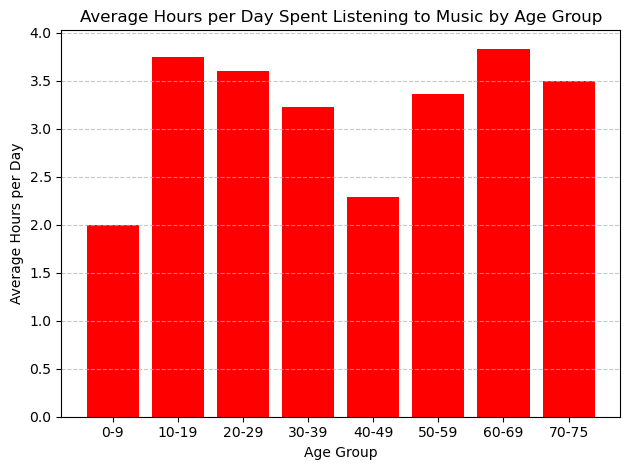

In [23]:
# Avoid changes to main dataset
temp_dataset = cleanedDataset

# Make bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 75]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-75']

# Create age group column
temp_dataset['Age Group'] = pd.cut(temp_dataset['Age'], bins=age_bins, labels=age_labels)

# Calculate mean hours per day for each age group
age_group_stats = temp_dataset.groupby('Age Group')['Hours per day'].mean().reset_index()


plt.bar(age_group_stats['Age Group'], age_group_stats['Hours per day'], color='red')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Day')
plt.title('Average Hours per Day Spent Listening to Music by Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

60-69 age group listens to the most music on average

## Some OLAP questions

In [24]:
cleanedDataset['Fav genre'].value_counts()

Rock                147
Pop                  96
Metal                71
Classical            36
Video game music     35
EDM                  34
Hip hop              31
R&B                  29
Folk                 24
K pop                20
Country              20
Jazz                 18
Rap                  18
Lofi                 10
Gospel                3
Latin                 2
Name: Fav genre, dtype: int64

Most popular genres in this dataset are:
1. Rock
2. Pop
3. Metal

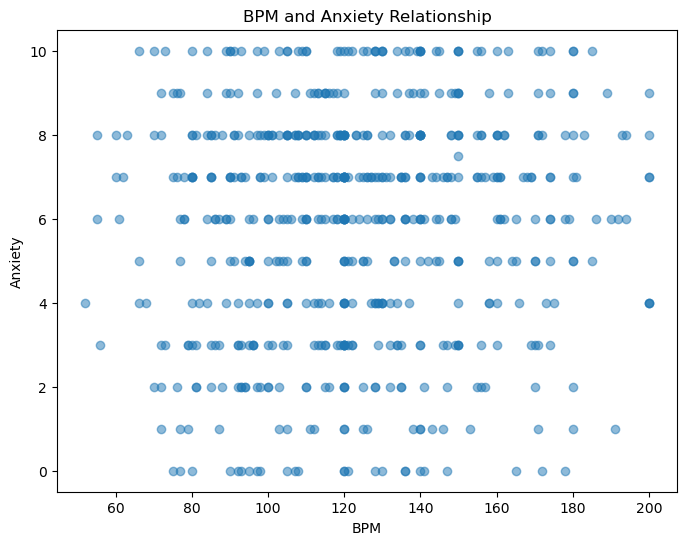

In [25]:
BPM = cleanedDataset['BPM']
Anxiety = cleanedDataset['Anxiety']

plt.figure(figsize=(8, 6))
plt.scatter(BPM, Anxiety, alpha=0.5)
plt.xlabel('BPM')
plt.ylabel('Anxiety')
plt.title('BPM and Anxiety Relationship')
plt.show()

There appears to be no real relationship between BPM and Anxiety

 OLAP Q.6: How does music preferences (genres of music) relate to mental health outcomes?

C:\Users\Ellice\AppData\Local\Temp\ipykernel_20280\2972822814.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = cleanedDataset.corr()


<Axes: >

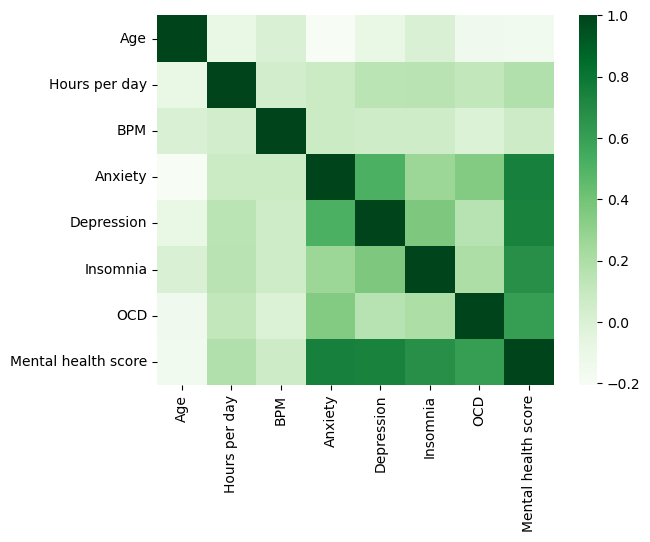

In [26]:
matrix = cleanedDataset.corr()
sns.heatmap(matrix, cmap="Greens")

<Axes: >

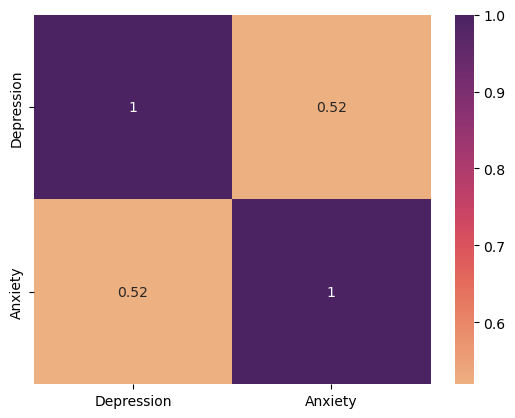

In [27]:
combine = pd.concat((cleanedDataset['Depression'], cleanedDataset['Anxiety']), axis=1)
matrix = combine.corr()
sns.heatmap(matrix, cmap="flare", annot=True)

The correlation between anxiety and depression is 0.52

<Axes: >

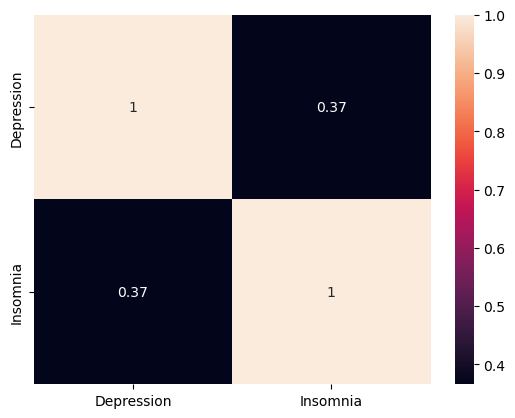

In [28]:
combine = pd.concat((cleanedDataset['Depression'], cleanedDataset['Insomnia']), axis=1)
matrix = combine.corr()
sns.heatmap(matrix, cmap="rocket", annot=True)

The correlation between depression and insomnia is 0.37

<Axes: >

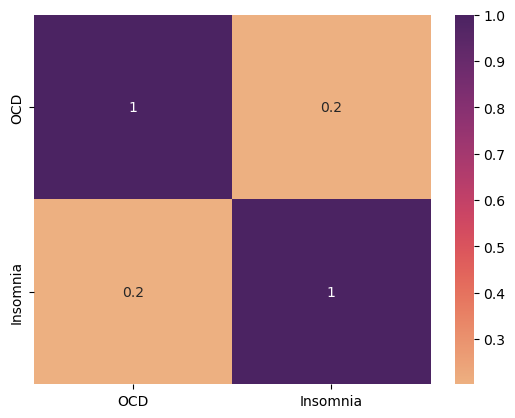

In [29]:
combine = pd.concat((cleanedDataset['OCD'], cleanedDataset['Insomnia']), axis=1)
matrix = combine.corr()
sns.heatmap(matrix, cmap="flare", annot=True)

The correlation between OCD and insomnia is 0.2

In [30]:
cleanedDataset

,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Mental health score,Age Group
2,18.0,Spotify,4.0,Video game music,Yes,132.0,Never,Never,Very frequently,Never,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,26.0,10-19
3,61.0,YouTube Music,2.5,Jazz,Yes,84.0,Sometimes,Never,Never,Rarely,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,22.0,60-69
4,18.0,Spotify,4.0,R&B,No,107.0,Never,Never,Rarely,Never,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,23.0,10-19
5,18.0,Spotify,5.0,Jazz,Yes,86.0,Rarely,Sometimes,Never,Never,...,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,30.0,10-19
6,18.0,YouTube Music,3.0,Video game music,Yes,66.0,Sometimes,Never,Rarely,Sometimes,...,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,18.0,10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Rock,Yes,120.0,Very frequently,Rarely,Never,Sometimes,...,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,22.0,10-19
732,18.0,Spotify,1.0,Pop,Yes,160.0,Rarely,Rarely,Never,Never,...,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,12.0,10-19
733,19.0,Other streaming service,6.0,Rap,No,120.0,Rarely,Sometimes,Sometimes,Rarely,...,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,8.0,10-19
734,19.0,Spotify,5.0,Classical,No,170.0,Very frequently,Never,Never,Never,...,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,8.0,10-19


In [31]:
grouped = cleanedDataset.groupby('Fav genre')

mental_health_stats = grouped[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()

mental_health_stats

,Anxiety,Depression,Insomnia,OCD
Fav genre,,,,
Classical,5.055556,4.527778,3.916667,2.444444
Country,5.700000,4.100000,2.600000,2.600000
EDM,5.294118,4.970588,4.000000,2.676471
Folk,6.583333,5.416667,4.125000,2.333333
Gospel,4.000000,1.333333,4.666667,0.666667
Hip hop,6.193548,6.064516,3.709677,2.741935
Jazz,5.833333,4.722222,4.000000,2.222222
K pop,6.650000,4.100000,3.350000,2.600000
Latin,5.000000,4.500000,4.500000,2.500000


    K-pop listeners have the highest level of anxiety

In [32]:
grouped = cleanedDataset.groupby('Fav genre')

mental_health_stats = grouped['Mental health score'].mean()

mental_health_stats

Fav genre
Classical           15.944444
Country             15.000000
EDM                 16.941176
Folk                18.458333
Gospel              10.666667
Hip hop             18.709677
Jazz                16.777778
K pop               16.700000
Latin               16.500000
Lofi                21.700000
Metal               17.140845
Pop                 16.682292
R&B                 15.137931
Rap                 14.722222
Rock                18.180272
Video game music    18.228571
Name: Mental health score, dtype: float64

## Data Visualisation

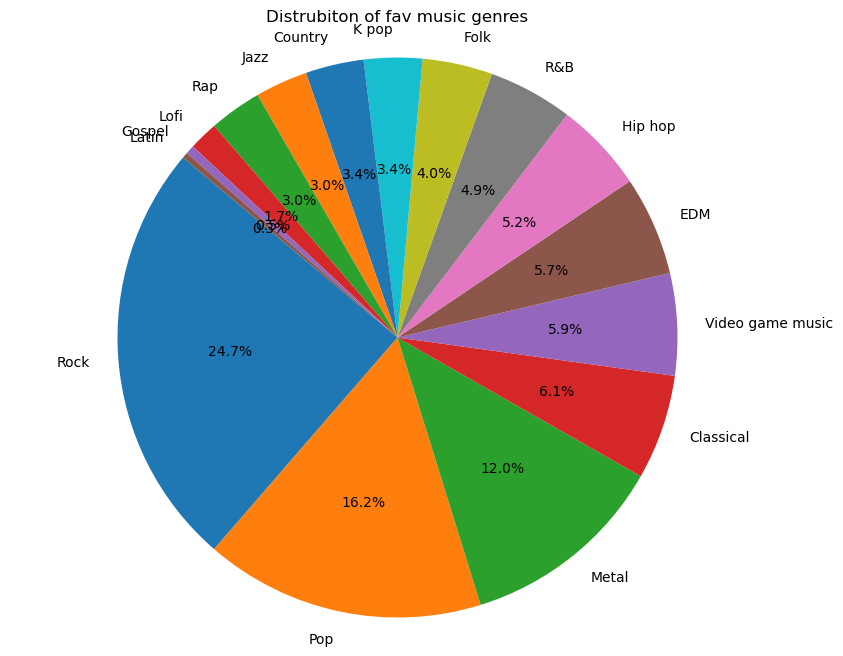

In [33]:
genre_counts = dataset['Fav genre'].value_counts()

explode = [0.1]*len(genre_counts.index)

plt.figure(figsize=(10,8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distrubiton of fav music genres')
plt.show()

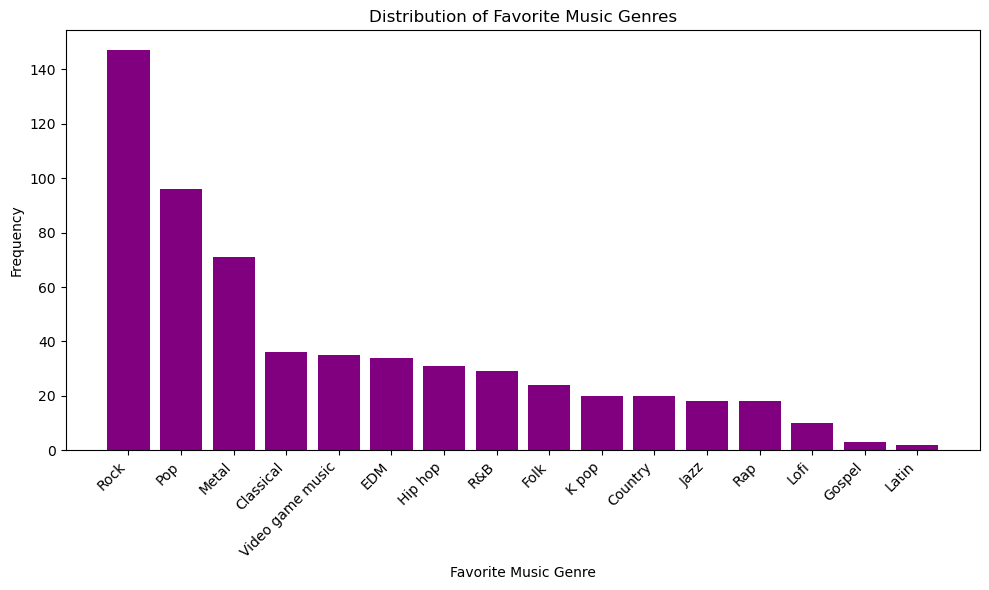

In [34]:
plt.figure(figsize=(10,6))
plt.bar(genre_counts.index, genre_counts.values, color='purple')
plt.xlabel('Favorite Music Genre')
plt.ylabel('Frequency')
plt.title('Distribution of Favorite Music Genres')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

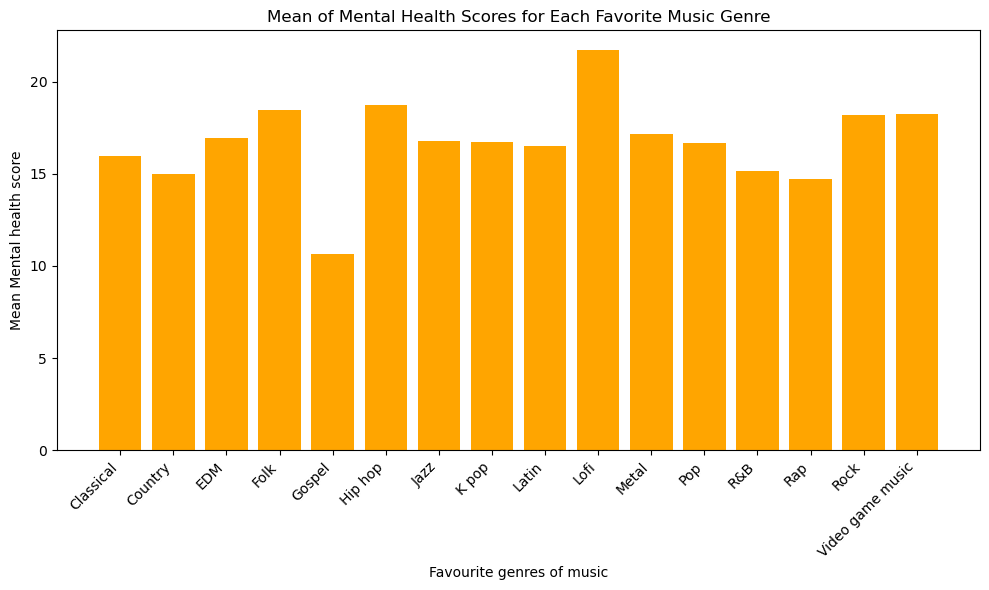

In [35]:
#mean mental health scores by favourite music genres

genre_means = dataset.groupby('Fav genre')['Mental health score'].mean()


plt.figure(figsize=(10,6))
plt.bar(genre_means.index, genre_means.values, color="orange")
plt.xlabel('Favourite genres of music')
plt.ylabel('Mean Mental health score')
plt.title('Mean of Mental Health Scores for Each Favorite Music Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


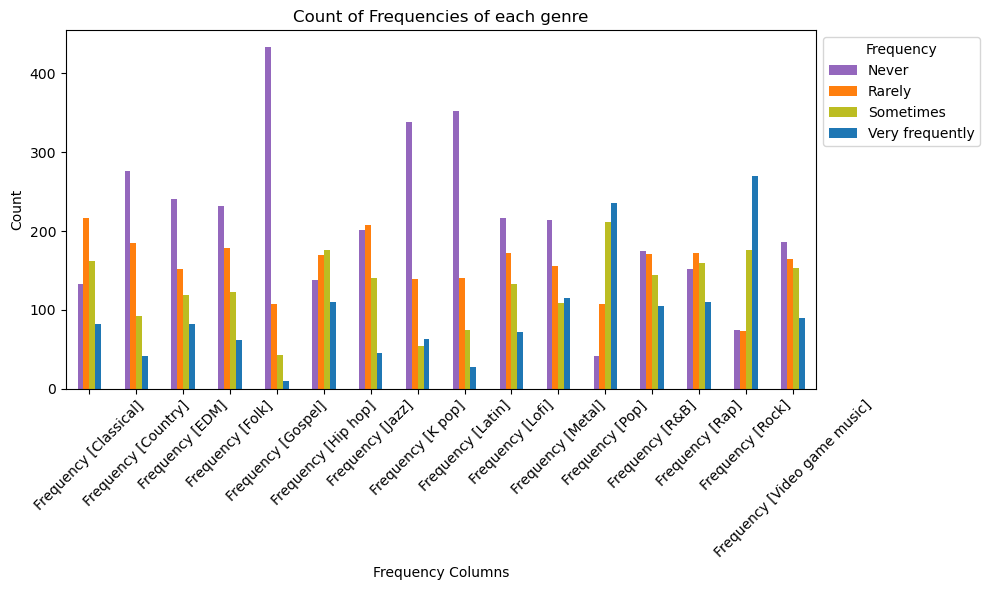

In [36]:
# Assuming df is your DataFrame and frequencies_cols contains the frequency columns
frequency_columns = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
                    'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
                    'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

counts = {}

for col in frequency_columns:
    value_counts = dataset[col].value_counts()
    never_count = value_counts.get('Never', 0)
    rarely_count = value_counts.get('Rarely', 0)
    sometimes_count = value_counts.get('Sometimes', 0)
    very_frequently_count = value_counts.get('Very frequently', 0)

    counts[col] = {
        'Never': never_count,
        'Rarely': rarely_count,
        'Sometimes': sometimes_count,
        'Very frequently': very_frequently_count
    }

dataset_counts = pd.DataFrame(counts).T

dataset_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['tab:purple', 'tab:orange', 'tab:olive', 'tab:blue'])
plt.title('Count of Frequencies of each genre')
plt.xlabel('Frequency Columns')
plt.ylabel('Count')
plt.legend(title='Frequency', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



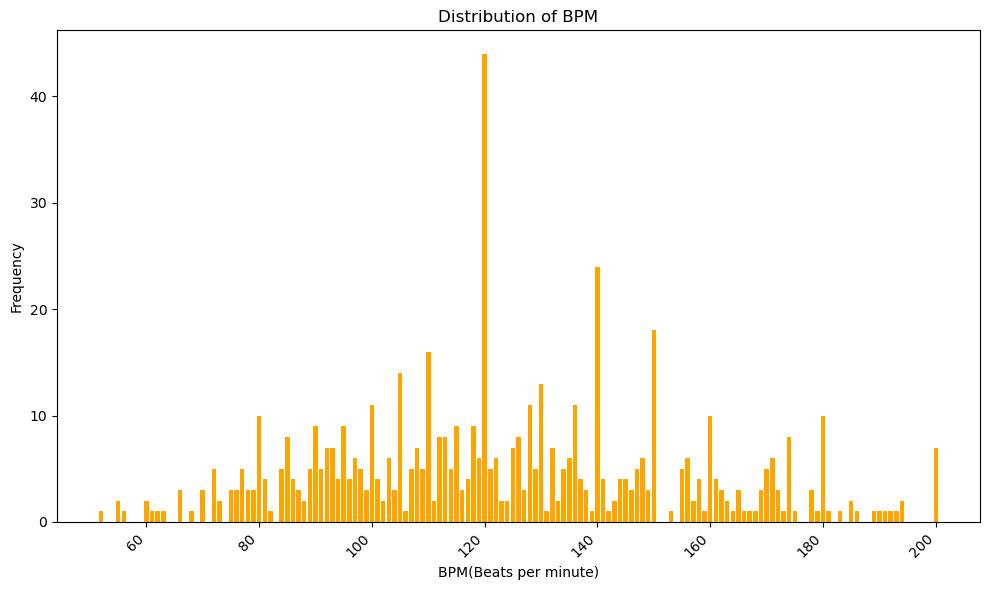

In [37]:
bpm_counts = dataset['BPM'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(bpm_counts.index, bpm_counts.values, color='orange')
plt.xlabel('BPM(Beats per minute)')
plt.ylabel('Frequency')
plt.title('Distribution of BPM')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

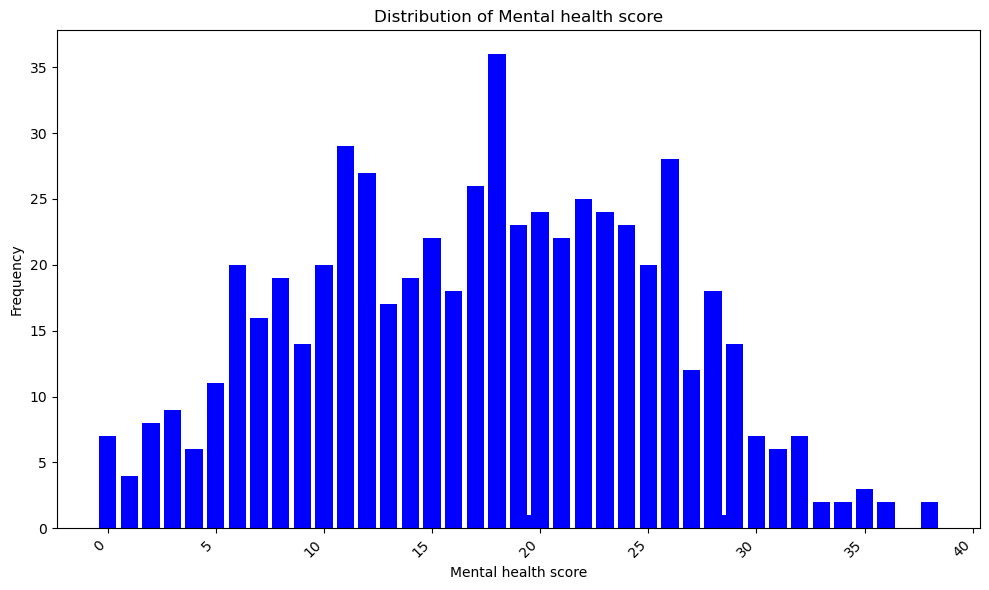

In [38]:
mhs_counts = dataset['Mental health score'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(mhs_counts.index, mhs_counts.values, color='blue')
plt.xlabel('Mental health score')
plt.ylabel('Frequency')
plt.title('Distribution of Mental health score')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

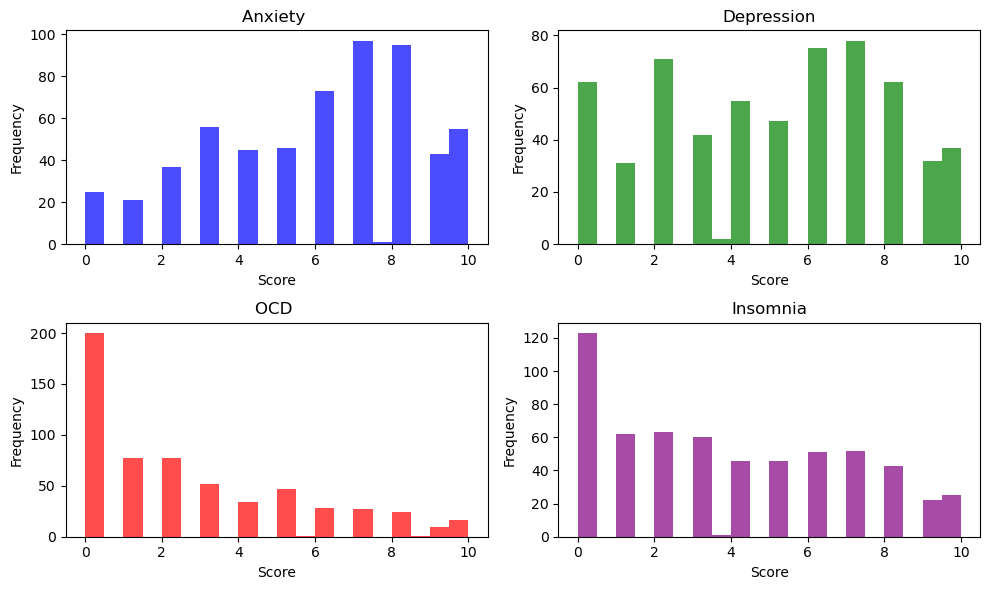

In [39]:

#histograms for Anxiety, Depression, OCD, and Insomnia
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(dataset['Anxiety'], bins=20, color='blue', alpha=0.7)
plt.title('Anxiety ')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(dataset['Depression'], bins=20, color='green', alpha=0.7)
plt.title('Depression')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(dataset['OCD'], bins=20, color='red', alpha=0.7)
plt.title('OCD ')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(dataset['Insomnia'], bins=20, color='purple', alpha=0.7)
plt.title('Insomnia')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

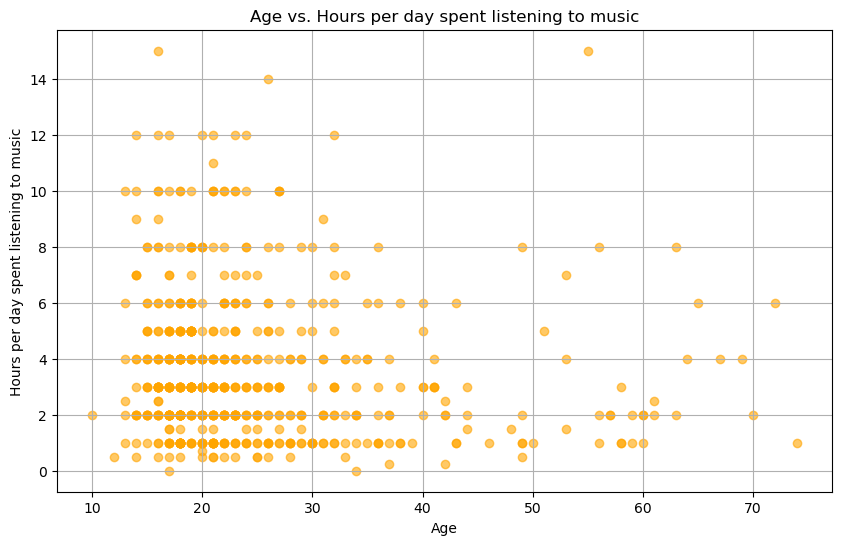

In [40]:
age = dataset['Age']
hours_per_day = dataset['Hours per day']


plt.figure(figsize=(10, 6))
plt.scatter(age, hours_per_day, color='orange', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Hours per day spent listening to music')
plt.title('Age vs. Hours per day spent listening to music')
plt.grid(True)
plt.show()


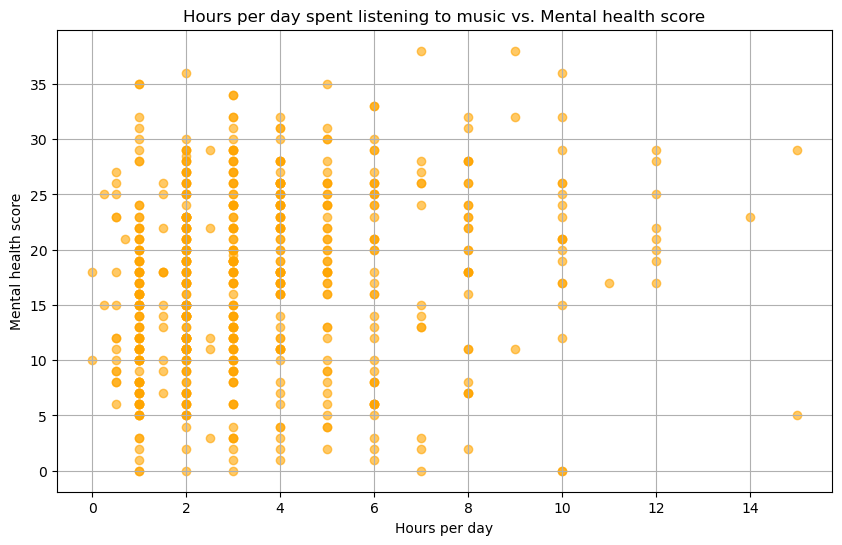

In [41]:
Hours_per_day = dataset['Hours per day']
mhs = dataset['Mental health score']


plt.figure(figsize=(10, 6))
plt.scatter(Hours_per_day,mhs , color='orange', alpha=0.6)
plt.xlabel('Hours per day')
plt.ylabel('Mental health score')
plt.title('Hours per day spent listening to music vs. Mental health score')
plt.grid(True)
plt.show()

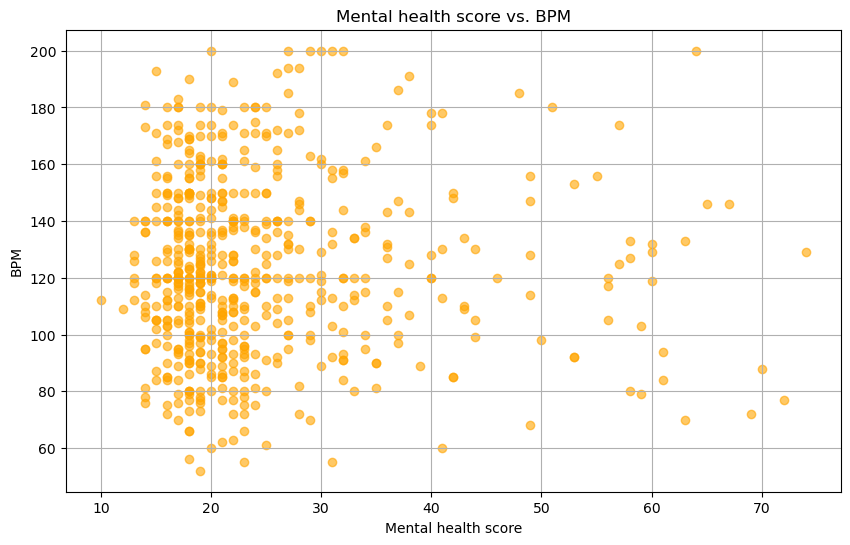

In [42]:
mhs = dataset['Mental health score']
bpm = dataset['BPM']


plt.figure(figsize=(10, 6))
plt.scatter(age, bpm, color='orange', alpha=0.6)
plt.xlabel('Mental health score')
plt.ylabel('BPM')
plt.title('Mental health score vs. BPM')
plt.grid(True)
plt.show()


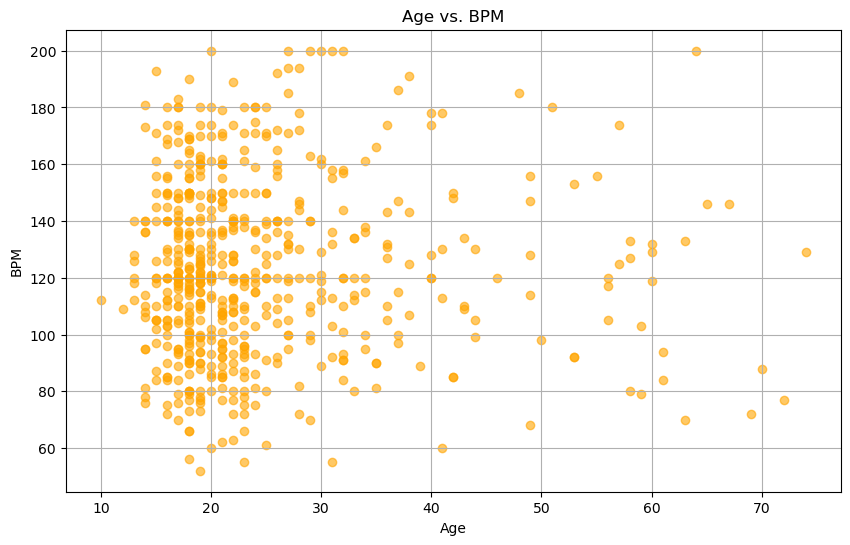

In [43]:
age = dataset['Age']
bpm = dataset['BPM']


plt.figure(figsize=(10, 6))
plt.scatter(age, bpm, color='orange', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('BPM')
plt.title('Age vs. BPM')
plt.grid(True)
plt.show()

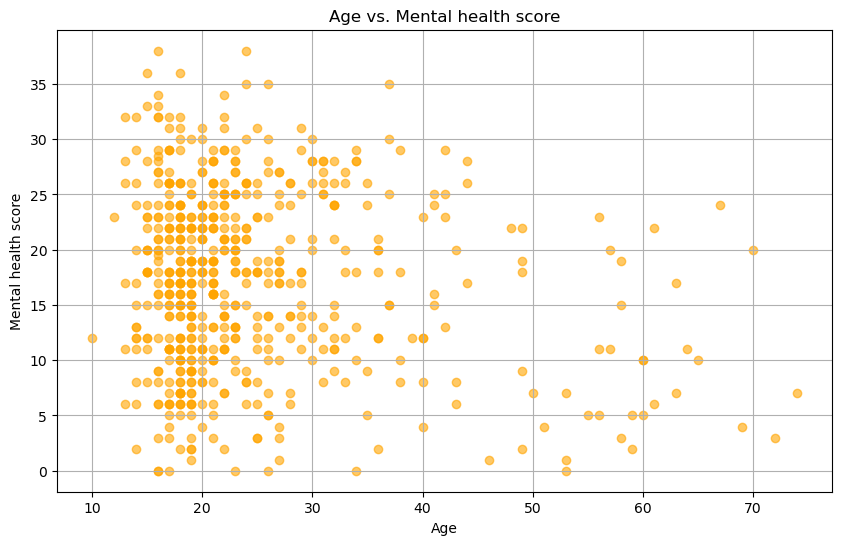

In [44]:
age = dataset['Age']
mental_health_score = dataset['Mental health score']


plt.figure(figsize=(10, 6))
plt.scatter(age, mental_health_score, color='orange', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Mental health score')
plt.title('Age vs. Mental health score')
plt.grid(True)
plt.show()


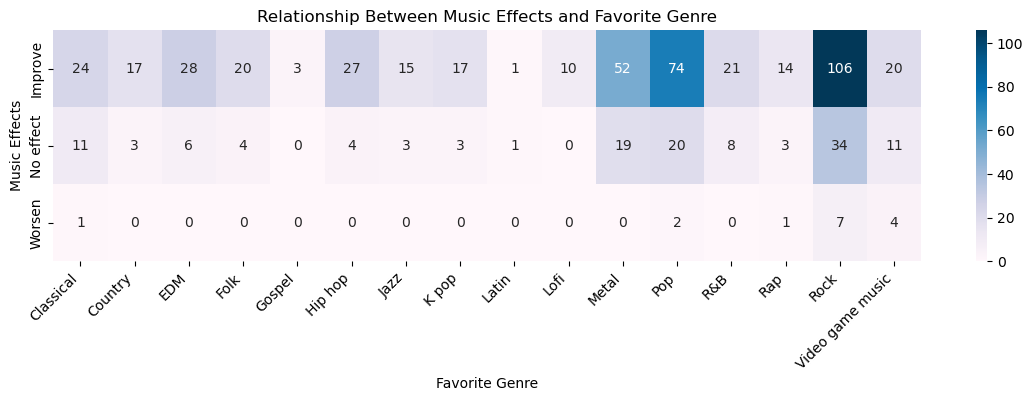

In [45]:
cross_tab = pd.crosstab(dataset['Music effects'], dataset['Fav genre'], margins=False)

plt.figure(figsize=(14, 3))
sns.heatmap(cross_tab, annot=True, cmap='PuBu', fmt='d', cbar=True)
plt.title('Relationship Between Music Effects and Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Music Effects')
plt.xticks(rotation=45, ha='right')
plt.show()


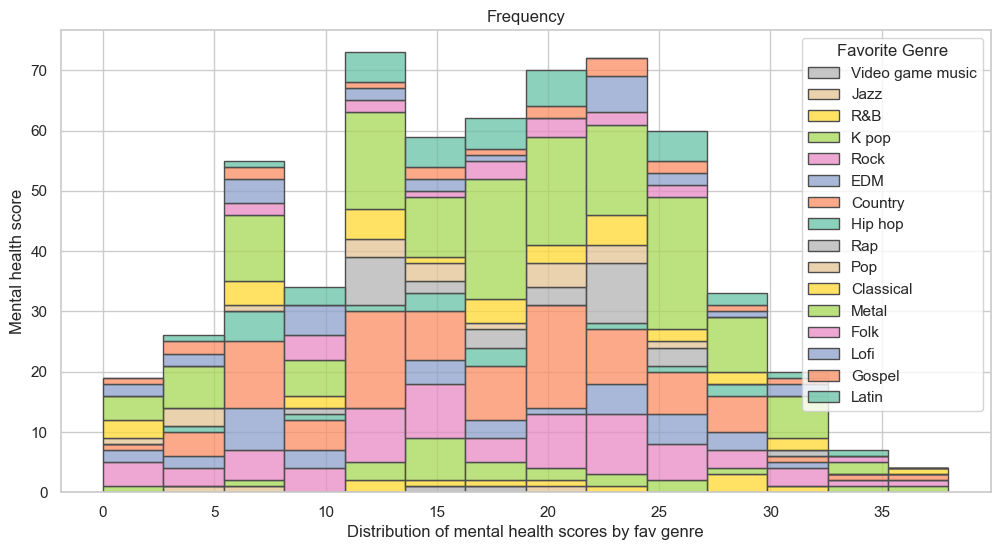

In [46]:
custom_palette = sns.color_palette("Set2", n_colors=16)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x="Mental health score", hue="Fav genre", multiple="stack", palette=custom_palette, edgecolor=".3")
plt.xlabel('Distribution of mental health scores by fav genre')
plt.ylabel('Mental health score')
plt.title('Frequency')
legend_labels = dataset['Fav genre'].unique()
plt.legend(title='Favorite Genre', labels=legend_labels)

plt.show()

In [47]:
genre_mean_scores = dataset.groupby('Fav genre')['Mental health score'].mean()

lowest_genre = genre_mean_scores.idxmin()
highest_genre = genre_mean_scores.idxmax()
lowest_score = genre_mean_scores.min()
highest_score = genre_mean_scores.max()

print(f"The genre with the lowest mean mental health score is '{lowest_genre}' with a score of {lowest_score:.2f}.")
print(f"The genre with the highest mean mental health score is '{highest_genre}' with a score of {highest_score:.2f}.")

The genre with the lowest mean mental health score is 'Gospel' with a score of 10.67.
The genre with the highest mean mental health score is 'Lofi' with a score of 21.70.


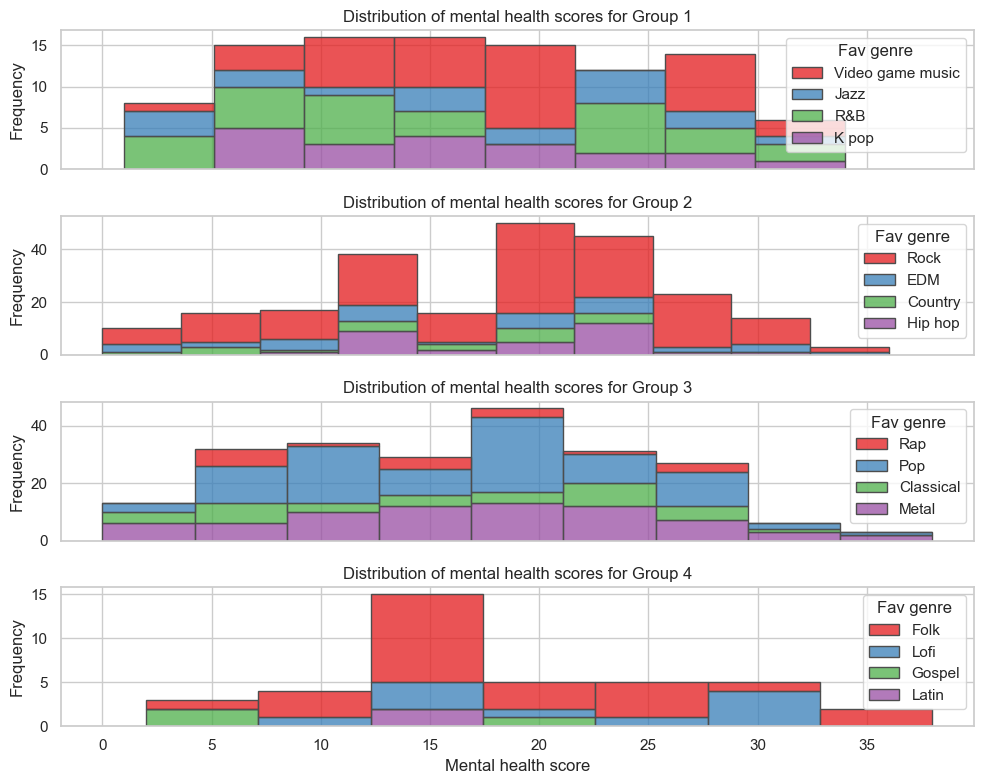

In [48]:
# splitting genres into 4 groups so they are easier to see
genres = dataset['Fav genre'].unique()
num_groups = 4
grouped_genres = np.array_split(genres, num_groups)
#making subplots for each group
fig, axes = plt.subplots(nrows=num_groups, ncols=1, figsize=(10, 8), sharex=True)
for i, group in enumerate(grouped_genres):
    # Filtering the dataset for genres in the current group and making the graph
    group_data = dataset[dataset['Fav genre'].isin(group)]
    sns.histplot(data=group_data, x="Mental health score", hue="Fav genre", ax=axes[i], multiple="stack", palette="Set1", edgecolor=".3")
    axes[i].set_xlabel('Mental health score')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of mental health scores for Group {i+1}')
    
plt.tight_layout()
plt.show()

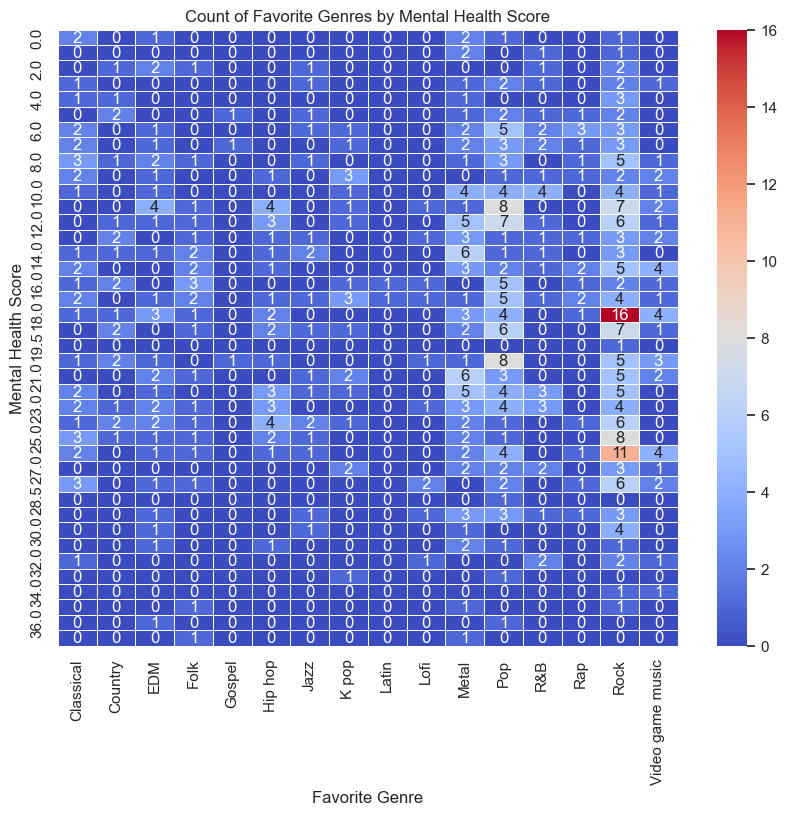

In [49]:
pivot_df = dataset.pivot_table(index='Mental health score', columns='Fav genre', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Count of Favorite Genres by Mental Health Score')
plt.xlabel('Favorite Genre')
plt.ylabel('Mental Health Score')
plt.show()

In [50]:
column_means = n_dataset.mean()
print(column_means)

Age                              24.510101
Hours per day                     3.578620
BPM                             123.151515
Anxiety                           5.882997
Depression                        4.900673
Insomnia                          3.783670
OCD                               2.644781
Mental health score              17.212121
Primary streaming service         3.436027
Fav genre                         9.447811
Foreign languages                 0.562290
Frequency [Classical]             1.324916
Frequency [Country]               0.828283
Frequency [EDM]                   1.070707
Frequency [Folk]                  1.023569
Frequency [Gospel]                0.377104
Frequency [Hip hop]               1.434343
Frequency [Jazz]                  1.050505
Frequency [K pop]                 0.734007
Frequency [Latin]                 0.626263
Frequency [Lofi]                  1.101010
Frequency [Metal]                 1.210438
Frequency [Pop]                   2.077441
Frequency [

In [51]:
modes = dataset.mode()
print(modes)

    Age Primary streaming service  Hours per day Fav genre Foreign languages  \
0  18.0                   Spotify            2.0      Rock               Yes   

     BPM Frequency [Classical] Frequency [Country] Frequency [EDM]  \
0  120.0                Rarely               Never           Never   

  Frequency [Folk]  ... Frequency [Rap] Frequency [Rock]  \
0            Never  ...          Rarely  Very frequently   

  Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  \
0                        Never     7.0        7.0      0.0  0.0       Improve   

  Mental health score Age Group  
0                18.0     10-19  

[1 rows x 29 columns]


In [52]:
summary_statistics = dataset.describe()
print(summary_statistics)

              Age  Hours per day         BPM     Anxiety  Depression  \
count  594.000000     594.000000  594.000000  594.000000  594.000000   
mean    24.510101       3.578620  123.151515    5.882997    4.900673   
std     10.880962       2.644092   30.782881    2.750170    2.986377   
min     10.000000       0.000000   52.000000    0.000000    0.000000   
25%     18.000000       2.000000  100.000000    4.000000    2.000000   
50%     21.000000       3.000000  120.000000    6.000000    5.000000   
75%     27.000000       5.000000  143.000000    8.000000    7.000000   
max     74.000000      15.000000  200.000000   10.000000   10.000000   

         Insomnia         OCD  Mental health score  
count  594.000000  594.000000           594.000000  
mean     3.783670    2.644781            17.212121  
std      3.091208    2.844049             8.096985  
min      0.000000    0.000000             0.000000  
25%      1.000000    0.000000            11.000000  
50%      3.000000    2.000000    

In [53]:
mode_numerical = n_dataset.mode()
print(mode_numerical)

    Age  Hours per day    BPM  Anxiety  Depression  Insomnia  OCD  \
0  18.0            2.0  120.0      7.0         7.0       0.0  0.0   

   Mental health score  Primary streaming service  Fav genre  ...  \
0                 18.0                          4         14  ...   

   Frequency [K pop]  Frequency [Latin]  Frequency [Lofi]  Frequency [Metal]  \
0                  0                  0                 0                  0   

   Frequency [Pop]  Frequency [R&B]  Frequency [Rap]  Frequency [Rock]  \
0                3                0                1                 3   

   Frequency [Video game music]  Music effects  
0                             0              0  

[1 rows x 28 columns]


# Multiple Linear Regression Model

## Retrieving Datasets and importing necessary libraries 

In [54]:
sb.set_style('whitegrid')
dataset = pd.read_csv("cleanedDatasetS.csv")
n_dataset = pd.read_csv("numericalDatasetS.csv")
dataset


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Primary streaming service,Fav genre,Foreign languages,...,Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects,Mental health score
0,-0.598806,0.159501,0.287691,0.406500,0.703560,2.012666,-0.226903,Spotify,Video game music,Yes,...,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,No effect,26.0
1,3.356381,-0.408280,-1.272932,1.134341,0.703560,-0.253729,0.125004,YouTube Music,Jazz,Yes,...,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,Improve,22.0
2,-0.598806,0.159501,-0.525134,0.406500,-0.972120,0.393812,2.236451,Spotify,R&B,No,...,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,Improve,23.0
3,-0.598806,0.538022,-1.207906,0.770420,1.038696,1.041354,1.532635,Spotify,Jazz,Yes,...,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,Improve,30.0
4,-0.598806,-0.219019,-1.858165,-0.685261,1.038696,0.717583,-0.930719,YouTube Music,Video game music,Yes,...,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,Improve,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.690787,-0.597540,-0.102465,0.406500,0.368424,-1.225042,2.236451,Spotify,Rock,Yes,...,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,Improve,22.0
590,-0.598806,-0.976060,1.198054,-1.049181,-0.972120,-0.577500,0.828820,Spotify,Pop,Yes,...,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,Improve,12.0
591,-0.506825,0.916542,-0.102465,-1.413101,-0.972120,-0.577500,-0.226903,Other streaming service,Rap,No,...,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Improve,8.0
592,-0.506825,0.538022,1.523183,-1.413101,-0.636984,-0.577500,-0.578811,Spotify,Classical,No,...,Never,Never,Never,Never,Never,Never,Never,Sometimes,Improve,8.0


## Checking correlation

In [55]:
print(n_dataset.corr())

                                   Age  Hours per day       BPM   Anxiety  \
Age                           1.000000      -0.087738  0.004859 -0.205720   
Hours per day                -0.087738       1.000000  0.043185  0.076648   
BPM                           0.004859       0.043185  1.000000  0.074798   
Anxiety                      -0.205720       0.076648  0.074798  1.000000   
Depression                   -0.087180       0.144600  0.060176  0.519389   
Insomnia                      0.003637       0.151470  0.062859  0.263219   
OCD                          -0.146933       0.117874 -0.008572  0.345836   
Primary streaming service    -0.089331       0.040548 -0.046571 -0.036598   
Fav genre                     0.018523      -0.025752  0.034100  0.068352   
Foreign languages            -0.105305       0.123299  0.036232  0.093336   
Frequency [Classical]         0.077097      -0.015205 -0.003452 -0.031174   
Frequency [Country]           0.127457       0.058762 -0.011971  0.002018   

## Splitting model 

In [56]:
np.random.seed(42)
X = n_dataset.drop(['Mental health score', 'Anxiety', 'OCD','Depression', 'Insomnia', 'Primary streaming service', 'Foreign languages'], axis=1)
y = n_dataset['Mental health score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,Hours per day,BPM,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
155,-0.782768,-0.597540,0.710359,0.327281,-1.364189,1.259012,-0.065842,0.970187,0.898429,-0.417811,...,0.264226,-0.715533,0.871586,-1.072445,1.003105,-0.282504,-0.362910,0.887663,-0.234310,-0.541642
550,-0.598806,0.538022,-1.630575,-0.305272,1.724737,1.259012,-0.065842,-1.017024,-0.543914,0.544125,...,1.257581,2.712100,0.871586,-1.072445,1.003105,0.649759,-0.362910,-0.076271,-1.181115,-0.541642
132,-0.322863,-0.219019,0.417742,0.327281,-0.334547,2.333513,0.865348,-0.023418,-0.543914,1.506062,...,-0.729130,2.712100,0.871586,-0.186447,1.003105,1.582022,1.528043,-0.076271,0.712495,3.480050
450,0.045061,0.159501,0.872924,0.327281,-0.334547,-0.889991,0.865348,-1.017024,-0.543914,1.506062,...,0.264226,0.427012,-0.097931,0.699551,1.003105,-0.282504,1.528043,0.887663,-0.234310,1.469204
287,0.780910,-1.165321,-1.402984,0.959833,0.695095,-0.889991,-0.065842,-1.017024,-0.543914,-1.379747,...,-0.729130,-0.715533,-0.097931,0.699551,-1.171509,-1.214767,-1.308386,-0.076271,-0.234310,-0.541642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.506825,-0.219019,-1.500523,0.538131,-0.334547,-0.889991,0.865348,-1.017024,-0.543914,1.506062,...,2.250937,0.427012,-0.097931,-0.186447,1.003105,1.582022,1.528043,-1.040205,1.659300,-0.541642
106,-0.690787,-0.597540,-0.037439,-0.937825,-0.334547,-0.889991,0.865348,0.970187,-0.543914,1.506062,...,0.264226,0.427012,-0.097931,1.585548,-1.171509,-0.282504,1.528043,0.887663,-1.181115,-0.541642
270,-0.690787,-0.219019,-0.330056,0.327281,0.695095,0.184510,-0.997032,-1.017024,-0.543914,1.506062,...,2.250937,0.427012,-1.067448,-1.072445,1.003105,-0.282504,1.528043,-0.076271,-0.234310,1.469204
435,-0.506825,-0.219019,-0.069952,0.959833,-1.364189,2.333513,-0.997032,-0.023418,2.340771,-1.379747,...,-0.729130,-0.715533,-1.067448,-0.186447,1.003105,-1.214767,0.582566,0.887663,0.712495,1.469204


## Training Model and Prediction

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

## Evaluation Metrics 

In [58]:
mse = mean_squared_error(y_test, y_predict)
r_squared = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)

print("Mean Square Error:", mse)
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Root Mean Square Error:", rmse)


Mean Square Error: 64.03927155313794
R-squared: 0.026600212888656327
Mean Absolute Error: 6.323278465656103
Root Mean Square Error: 8.002454095659527


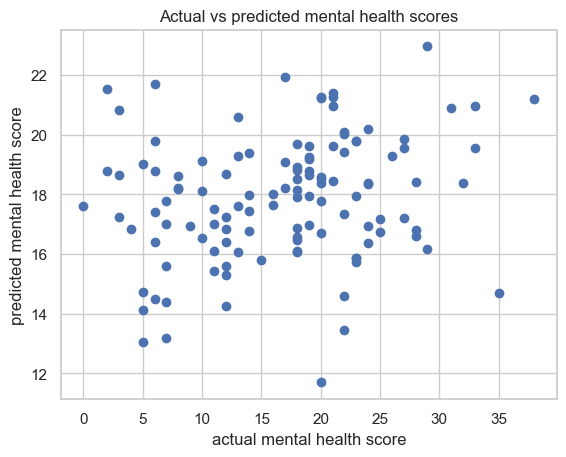

In [59]:
plt.scatter(y_test, y_predict)
plt.xlabel('actual mental health score')
plt.ylabel("predicted mental health score")
plt.title("Actual vs predicted mental health scores")
plt.show()

In [60]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predict})
reg_model_diff

,Actual value,Predicted value
30,23.0,19.798505
299,29.0,16.164355
177,25.0,17.171784
204,18.0,17.913707
354,33.0,20.960709
...,...,...
580,19.0,18.796405
228,24.0,16.372962
84,7.0,17.765885
140,18.0,16.096480


## Information on dataset 

In [61]:
num_columns = X.shape[1]
print("Number of columns in the dataset:", num_columns)

Number of columns in the dataset: 21


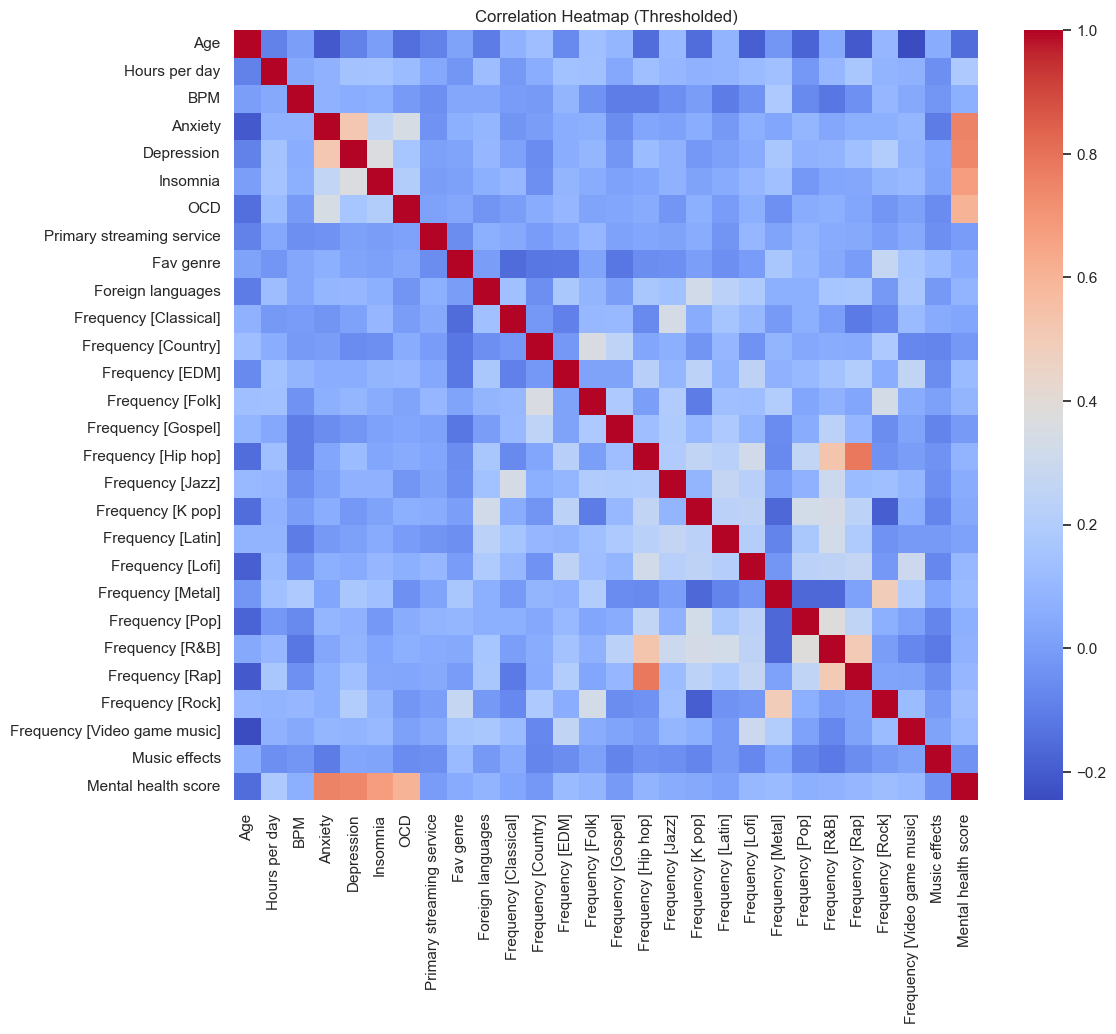

In [62]:
corr = n_dataset.corr()
threshold = 0.7
corr_filtered = corr[(corr >= threshold) | (corr <= threshold)]

plt.figure(figsize=(12,10))
sb.heatmap(n_dataset.corr(),cmap = 'coolwarm')
plt.title('Correlation Heatmap (Thresholded)')
plt.show()

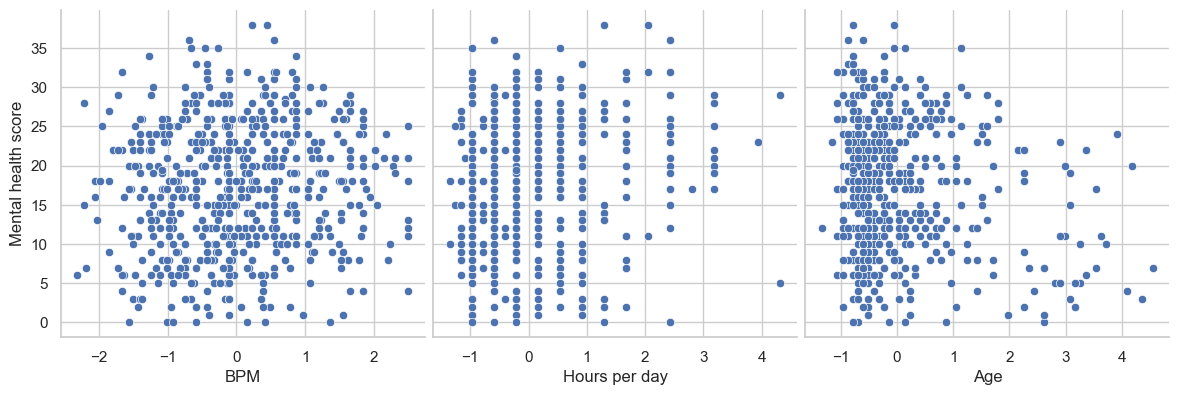

In [63]:
sb.pairplot(n_dataset, x_vars=['BPM', 'Hours per day', 'Age'], y_vars='Mental health score', height=4, aspect=1, kind='scatter')
plt.show()

In [64]:
print(n_dataset.columns)

Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Primary streaming service', 'Fav genre', 'Foreign languages',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Music effects', 'Mental health score'],
      dtype='object')


In [65]:
print(X_train.columns)

Index(['Age', 'Hours per day', 'BPM', 'Fav genre', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Music effects'],
      dtype='object')


# Optimisation

## Lasso model

In [66]:


#Lasso model
lasso = Lasso()

#grid of hyperparameters 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

#grid search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_lasso = Lasso(alpha=best_alpha)

best_lasso.fit(X_train, y_train)

y_pred_lasso = best_lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(" Lasso - Mean Squared Error:", mse)
print("Lasso - R-squared:", r2)


 Lasso - Mean Squared Error: 63.22752206017585
Lasso - R-squared: 0.03893884142819848


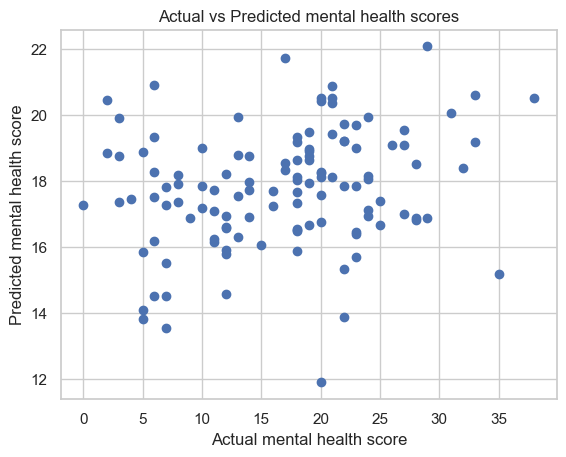

In [67]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual mental health score')
plt.ylabel("Predicted mental health score")
plt.title("Actual vs Predicted mental health scores")
plt.show()

## Elastic Net 

In [68]:
#Multiple linear regression refers to a linear regression model with more than one independent variable. 
#In the case of Elastic Net regression, the model predicts the target variable by linearly 
#combining multiple independent variables (features),
#just like in traditional multiple linear regression.


# Elastic Net with hyperparameter tuning
elastic_net = ElasticNet()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic_net.fit(X_train, y_train)
y_pred_elastic_net = best_elastic_net.predict(X_test)


best_elastic_net.fit(X_train, y_train)

y_pred_elastic_net = best_elastic_net.predict(X_test)

mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print("Elastic Net - Mean Squared Error:", mse_elastic_net)
print("Elastic Net - R-squared:", r2_elastic_net)


Elastic Net - Mean Squared Error: 62.89321591602351
Elastic Net - R-squared: 0.044020309746867436


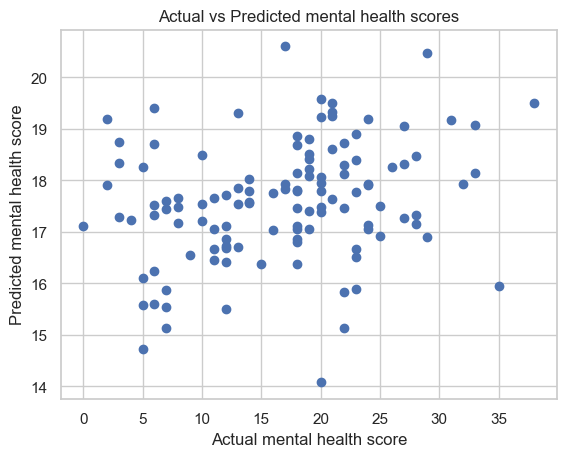

In [69]:
plt.scatter(y_test, y_pred_elastic_net)
plt.xlabel('Actual mental health score')
plt.ylabel("Predicted mental health score")
plt.title("Actual vs Predicted mental health scores")
plt.show()

## Training Model

In [70]:
X2 = n_dataset[['BPM', 'Age']]
y2 = n_dataset['Mental health score']

model = LinearRegression()
model.fit(X2, y2)
predicted_scores = model.predict(X2)


## Evaluation Metrics

In [71]:
mse = mean_squared_error(y2, predicted_scores)
r_squared = r2_score(y2, predicted_scores)
mae = mean_absolute_error(y2, predicted_scores)
rmse = mean_squared_error(y2, predicted_scores, squared=False)

print("Mean Square Error:", mse)
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Root Mean Square Error:", rmse)


Mean Square Error: 63.61908349586193
R-squared: 0.02798609730972268
Mean Absolute Error: 6.643540927942628
Root Mean Square Error: 7.976157188512644


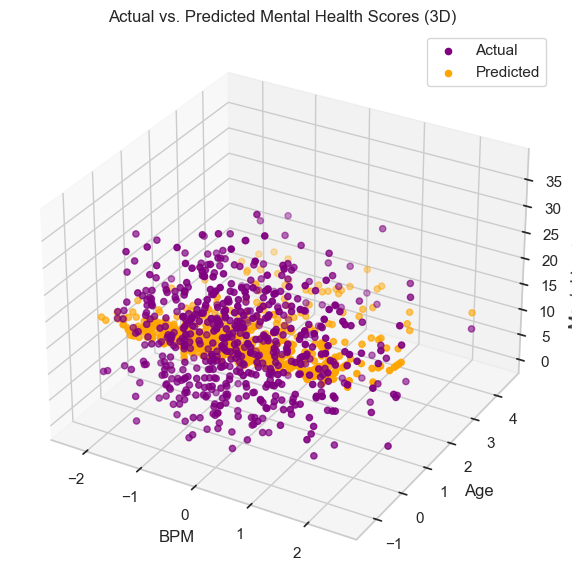

In [72]:
predicted_scores = model.predict(X2)

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X2['BPM'], X2['Age'], y2, color='purple', label='Actual')
ax1.scatter(X2['BPM'], X2['Age'], predicted_scores, color='orange', label='Predicted')
ax1.set_xlabel('BPM')
ax1.set_ylabel('Age')
ax1.set_zlabel('Mental health score')
ax1.set_title('Actual vs. Predicted Mental Health Scores (3D)')
ax1.legend()

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


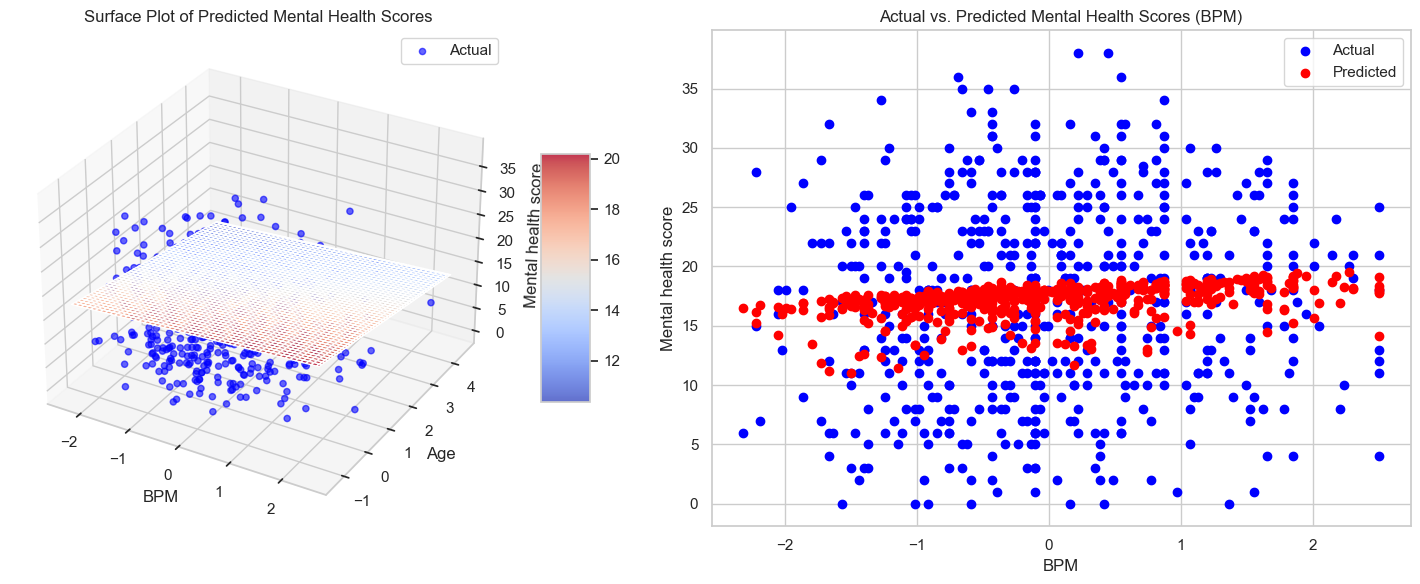

In [73]:
X2.columns = ['BPM', 'Age']
# Creating a meshgrid for the surface plot
bpm_range = np.linspace(min(X2['BPM']), max(X2['BPM']), 100)
age_range = np.linspace(min(X2['Age']), max(X2['Age']), 100)
BPM, Age = np.meshgrid(bpm_range, age_range)
predicted_scores_surface = model.predict(np.array([BPM.ravel(), Age.ravel()]).T).reshape(BPM.shape)

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surface = ax1.plot_surface(BPM, Age, predicted_scores_surface, cmap=cm.coolwarm, alpha=0.8)
ax1.scatter(X2['BPM'], X2['Age'], y2, color='blue', label='Actual', alpha=0.6, s=20)
ax1.set_xlabel('BPM')
ax1.set_ylabel('Age')
ax1.set_zlabel('Mental health score')
ax1.set_title('Surface Plot of Predicted Mental Health Scores')
fig.colorbar(surface, shrink=0.5, aspect=5)
ax1.legend()


ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X2['BPM'], y2, color='blue', label='Actual')
ax2.scatter(X2['BPM'], predicted_scores, color='red', label='Predicted')
ax2.set_xlabel('BPM')
ax2.set_ylabel('Mental health score')
ax2.set_title('Actual vs. Predicted Mental Health Scores (BPM)')
ax2.legend()

plt.tight_layout()
plt.show()


# Random Forest Regression Models

## Retrieve datasets

In [74]:
np.random.seed(37)

dataset_enc = pd.read_csv('numercialDataset.csv')
dataset_enc_s = pd.read_csv("numericalDatasetS.csv")

## Preparing input sample for all columns

In [75]:
# Preparing input sample for all columns
def sample_prep(dataset):
    inp = dataset
    inp = inp.drop('Insomnia', axis=1)
    inp = inp.drop('OCD', axis=1)
    inp = inp.drop('Depression', axis=1)
    inp = inp.drop('Mental health score', axis=1)
    inp = inp.drop('Anxiety', axis=1)

    # Preparing input sample for genre columns
    # inp = inp.drop('Age', axis=1)
    # inp = inp.drop('Hours per day', axis=1)
    # inp = inp.drop('BPM', axis=1)
    # inp = inp.drop('Primary streaming service', axis=1)
    # inp = inp.drop('Music effects', axis=1)
    return inp

# inp = sample_prep(dataset_enc)
inp = sample_prep(dataset_enc_s)
inp

,Age,Hours per day,BPM,Primary streaming service,Fav genre,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,-0.598806,0.159501,0.287691,0.400127,1.170684,0.882294,-1.364189,-0.889991,1.796538,-1.017024,...,2.250937,-0.715533,0.871586,0.699551,-1.171509,-1.214767,-0.362910,-1.040205,1.659300,1.469204
1,3.356381,-0.408280,-1.272932,1.109606,-0.726974,0.882294,0.695095,-0.889991,-0.997032,-0.023418,...,1.257581,2.712100,0.871586,-1.072445,-0.084202,0.649759,-1.308386,-2.004139,-1.181115,-0.541642
2,-0.598806,0.159501,-0.525134,0.400127,0.538131,-1.133409,-1.364189,-0.889991,-0.065842,-1.017024,...,2.250937,1.569556,0.871586,-1.072445,-0.084202,1.582022,1.528043,-2.004139,-0.234310,-0.541642
3,-0.598806,0.538022,-1.207906,0.400127,-0.726974,0.882294,-0.334547,1.259012,-0.997032,-1.017024,...,2.250937,0.427012,1.841103,-0.186447,1.003105,1.582022,1.528043,0.887663,-1.181115,-0.541642
4,-0.598806,-0.219019,-1.858165,1.109606,1.170684,0.882294,0.695095,-0.889991,-0.065842,0.970187,...,-0.729130,0.427012,-0.097931,-0.186447,-1.171509,-0.282504,-1.308386,-2.004139,0.712495,-0.541642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.690787,-0.597540,-0.102465,0.400127,0.959833,0.882294,1.724737,0.184510,-0.997032,0.970187,...,-0.729130,1.569556,-0.097931,-0.186447,1.003105,-1.214767,-0.362910,0.887663,-1.181115,-0.541642
590,-0.598806,-0.976060,1.198054,0.400127,0.327281,0.882294,-0.334547,0.184510,-0.997032,-1.017024,...,-0.729130,-0.715533,-0.097931,-1.072445,1.003105,-1.214767,-1.308386,-0.076271,0.712495,-0.541642
591,-0.506825,0.916542,-0.102465,-1.018831,0.748982,-1.133409,-0.334547,1.259012,0.865348,-0.023418,...,0.264226,0.427012,0.871586,-0.186447,-0.084202,0.649759,0.582566,-1.040205,-0.234310,-0.541642
592,-0.506825,0.538022,1.523183,0.400127,-1.992080,-1.133409,1.724737,-0.889991,-0.997032,-1.017024,...,-0.729130,-0.715533,-1.067448,-1.072445,-2.258816,-1.214767,-1.308386,-2.004139,0.712495,-0.541642


## Train model and test

In [76]:

# Define x
X = inp

#'y' is target variable
y = dataset_enc_s['Mental health score']

pre_opt_regressor = RandomForestRegressor(random_state=37)


# Fitting Random Forest Regression to the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


pre_opt_regressor.fit(X_train, y_train)

# # Make predictions
y_pred = pre_opt_regressor.predict(X_test)

## Visualise the outcome accuracy (Pre Opt)

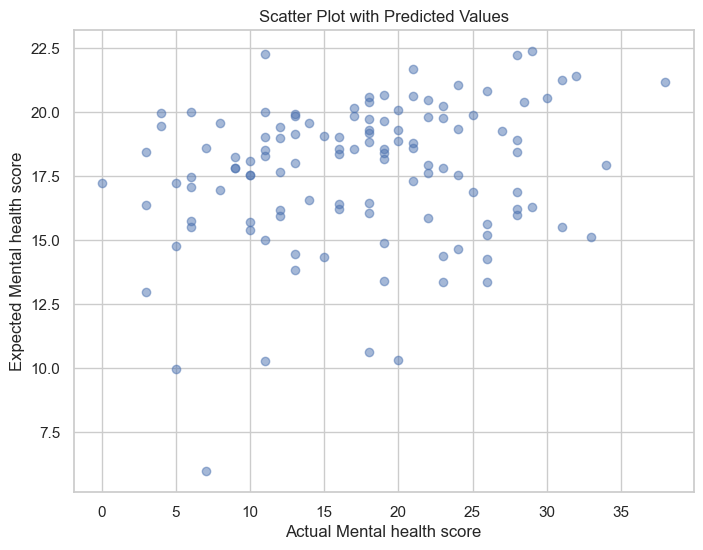

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

## Evaluate different accuracy measurements (Pre Opt)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6.54016806722689
Mean Squared Error (MSE): 63.50981890756304
Root Mean Squared Error (RMSE): 7.9693047944951285
R-squared (R2): 0.024285343274595195


## Show Model

In [79]:

 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
# tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
# plt.figure(figsize=(50, 30))
# plot_tree(tree_to_plot, feature_names=dataset_enc.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree from Random Forest")
# plt.show()

## Hyperparameters imports

In [80]:
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


## Format the best hyperparameters print

In [81]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    best_params = results.best_params_
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in  zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
    return best_params

## Define parameters to try and fit

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

regressor = RandomForestRegressor(random_state=37)

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

best_parameters = print_results(grid_search)

In [ ]:
# Previously ran best parameters
# best_parameters = {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}

In [ ]:
hp_regressor = RandomForestRegressor(**best_parameters, random_state=37)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

hp_regressor.fit(X_train_val, y_train_val)
val_score = hp_regressor.score(X_val, y_val)
test_score = hp_regressor.score(X_test, y_test)

print("Validation Score:", val_score)
print("Test Score:", test_score)

# # Make predictions
y_pred = hp_regressor.predict(X_test)

## Visualise the outcome accuracy (Post Hyp-Opt)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

## Evaluate different accuracy measurements (Post Hyp-Opt)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

## Find the importance of each feature

In [ ]:
importance = hp_regressor.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

## View all X features

In [ ]:
X

## Visualise feature importance

In [ ]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature Index')
pyplot.ylabel('Importance Value')
pyplot.title('Feature Importance Values')
pyplot.show()

## Remove unimportant features

In [ ]:
X = X.drop('Foreign languages', axis=1) #6
X = X.drop('Frequency [Gospel]', axis=1) #11
X = X.drop('Frequency [Classical]', axis=1) #7
X = X.drop('Frequency [Country]', axis=1) #8
X = X.drop('Frequency [Hip hop]', axis=1) #12
X = X.drop('Frequency [K pop]', axis=1) #14
X = X.drop('Music effects', axis=1) #23
X = X.drop('Frequency [R&B]', axis=1) #19
X

## Create a new model

In [ ]:
#'y' is target variable
y = dataset_enc['Mental health score']

feature_imp_regressor = RandomForestRegressor(random_state=58)


# Fitting Random Forest Regression to the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


feature_imp_regressor.fit(X_train, y_train)

# # Make predictions
y_pred = feature_imp_regressor.predict(X_test)

## View accuracy (Post feature removals, Pre Hyp-Opt)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

## Find optimal hyperparameters for feature removed model

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

f_regressor = RandomForestRegressor(random_state=58)

grid_search = GridSearchCV(f_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

best_parameters = print_results(grid_search)

## Train a model with best parameters and evaluate validation score

In [ ]:
hp_feature_regressor = RandomForestRegressor(**best_parameters, random_state=30)
y_train = pd.DataFrame(y_train) 
y_val = pd.DataFrame(y_val)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

hp_feature_regressor.fit(X_train_val, y_train_val)
val_score = hp_feature_regressor.score(X_val, y_val)
test_score = hp_feature_regressor.score(X_test, y_test)

print("Validation Score:", val_score)
print("Test Score:", test_score)

# # Make predictions
y_pred = hp_feature_regressor.predict(X_test)

## View accuracy (Post feature removals, Post Hyp-Opt)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Naive Bayes Classification

In [ ]:
np.random.seed(42)
dataset = pd.read_csv('HotDatasetS.csv')

Split 'Mental Health Score' into multiple categories of Mental Health

In [ ]:
bins = [0, 10, 20, 30, 40]
labels = ['Very low', 'Low', 'Moderate', 'High']
dataset['Mental health category'] = pd.cut(dataset['Mental health score'], bins=bins, labels=labels)

X = dataset.drop(['Mental health score', 'Mental health category'], axis=1) # X is the feature
y = dataset['Mental health category'] # y is the target variable
dataset

Create pipelines and split training/testing/validation sets

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
# Encoded a unique value to the categories, such that
# 0 - [Zero Category]
# 1 - [Very Low 0-10]
# 2 - [Low 10-20]
# 3 - [Moderate 20-30]
# 4 - [High 30-40]

# Split the dataset into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# Splitting test set in half, one half remains in test set and the other goes to the validation set

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # SimpleImputer replaces all missing values with the median
    ('scaler', StandardScaler())])
    # StandardScaler makes each feature have a standard deviation of 1 and a mean of 0

    # NOTE: StandardScaler does not modify the data, it only transforms it to be easier to read by a Machine Learning model.
    # This means the data sent into the model is the exact same as the dataset, only its been standardized
    # More info on https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # This instance of SimpleImputer replaces missing values with the one that appears most frequently
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, X.select_dtypes(include=['object']).columns)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GaussianNB())])

pipeline.fit(X_train, y_train)

Predict on Testing Set

In [ ]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy *= 100
print("Naive Bayes Testing Set Metrics:")
print("Accuracy: ", accuracy, "%", sep="")

Predict on Validation Set

In [ ]:
y_pred_valid = pipeline.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
accuracy_valid *= 100
print("Naive Bayes Validation Set Metrics:")
print("Accuracy: ", accuracy_valid, "%", sep="")

In [ ]:
X_test

In [ ]:
print(y_test)

# NOTE: 0 - [Zero Category]
#       1 - [Very Low 0-10]
#       2 - [Low 10-20]
#       3 - [Moderate 20-30]
#       4 - [High 30-40]

In [ ]:
print(y_pred)

# NOTE: 0 - [Zero Category]
#       1 - [Very Low 0-10]
#       2 - [Low 10-20]
#       3 - [Moderate 20-30]
#       4 - [High 30-40]

Classification Report

In [ ]:
print("Classification Report for Gaussian Naive Bayes Classifier:")
labels = ['Zero Category','Very low', 'Low', 'Moderate', 'High']
print(classification_report(y_test, y_pred, target_names=labels))

Table comparing actual value to predicted value

In [ ]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

Scatter plot showing the above table

In [ ]:
reg_model_diff.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Mental Health Categories')
plt.ylabel('Actual Mental Health Categories')
plt.title('Confusion Matrix')
plt.show()

# Multi-Layer Perceptron Classification

In [ ]:
np.random.seed(42)
dataset = pd.read_csv('HotDatasetS.csv')
dataset

Split 'Mental Health Score' into multiple categories of Mental Health

In [ ]:
bins = [0, 10, 20, 30, 40]
labels = ['Very low', 'Low', 'Moderate', 'High']
dataset['Mental health category'] = pd.cut(dataset['Mental health score'], bins=bins, labels=labels)

X = dataset.drop(['Mental health score', 'Mental health category'], axis=1) # X is the feature
y = dataset['Mental health category'] # y is the target variable
dataset
# This piece of code is common with Naive_Bayes.ipynb

Create pipelines and split training/testing/validation sets

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
# Encoded a unique value to the categories, such that
# 0 - [Zero Category]
# 1 - [Very Low 0-10]
# 2 - [Low 10-20]
# 3 - [Moderate 20-30]
# 4 - [High 30-40]

# Split the dataset into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# Splitting test set in half, one half remains in test set and the other goes to the validation set

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # SimpleImputer replaces all missing values with the median
    ('scaler', StandardScaler())])
    # StandardScaler makes each feature have a standard deviation of 1 and a mean of 0

    # NOTE: StandardScaler does not modify the data, it only transforms it to be easier to read by a Machine Learning model.
    # This means the data sent into the model is the exact same as the dataset, only its been standardized
    # More info on https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # This instance of SimpleImputer replaces missing values with the one that appears most frequently
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, X.select_dtypes(include=['object']).columns)
    ]
)

# This piece of code is common with Naive_Bayes.ipynb

Use GridSearchCV to find best estimator/best parameters

In [ ]:
pipeline_mlp = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', MLPClassifier(random_state=42))])

param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], # 4 combinations
    'classifier__activation': ['relu', 'tanh'], # 2 combinations
    'classifier__alpha': [0.0001, 0.001, 0.01], # 3 Combinations
    'classifier__learning_rate': ['constant', 'adaptive'], # 2 Combinations
}
# 4*2*3*2 = 48
# There are 48 possible combinations for hyperparameters

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Ignoring warnings that could make the logs unreadable, mainly ConvergenceWarning
    grid_search = GridSearchCV(pipeline_mlp, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

best_mlp_model = grid_search.best_estimator_
# best_estimator_ is a new estimator which the GridSearch found gave the highest scores
print("Best Parameters:", grid_search.best_params_)

Predict on testing set

In [ ]:
y_pred_mlp = best_mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp) * 100
print("MLP Classifier Testing Set Metrics:")
print("Accuracy: ", accuracy_mlp, "%", sep="")

Predict on Validation Set

In [ ]:
y_pred_mlp_valid = best_mlp_model.predict(X_valid)
accuracy_mlp_valid = accuracy_score(y_valid, y_pred_mlp_valid) * 100
print("MLP Classifier Validation Set Metrics:")
print("Accuracy: ", accuracy_mlp_valid, "%", sep="")

Confusion Matrix

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

Creating a table and a scatter plot out of the Actual Value vs. Predicted Value

In [ ]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlp})
reg_model_diff

In [ ]:
reg_model_diff.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Classification Report

In [ ]:
print("Classification Report for MLP Classifier:")
labels = ['Zero Category', 'Very Low', 'Low', 'Moderate', 'High']
print(classification_report(y_test, y_pred_mlp, target_names=labels))

In [ ]:
bpm_by_category = dataset.groupby('Mental health category')['BPM'].mean()

print("Average BPM for each mental health category:\n")
print(bpm_by_category)

correlation = dataset['BPM'].corr(dataset['Mental health score'])
print("\nCorrelation between BPM & Mental Health Score:",correlation,"\n")
if correlation > 0:
    print("There is a positive correlation between BPM and mental health.")
elif correlation < 0:
    print("There is a negative correlation between BPM and mental health.")
else:
    print("There is no significant correlation between BPM and mental health.")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Mental health category', y='BPM', data=dataset, order=labels)
plt.title('Relationship between BPM and Mental Health Categories')
plt.xlabel('Mental Health Category')
plt.ylabel('BPM')
plt.show()